In [ ]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
random.seed(42)

## Real Data Generate

In [ ]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8,1.0),
         random.uniform(0.0,0.2),
         random.uniform(0.8,1.0),
         random.uniform(0.0,0.2)]
    )
    return real_data

In [ ]:
generate_real()

tensor([0.9279, 0.0050, 0.8550, 0.0446])

## Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4,3),
            nn.Sigmoid(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )    
        self.loss = nn.MSELoss()

        self.optimizer = torch.optim.SGD(self.parameters(),lr= 1e-3)

        self.counter = 0
        self.progress = []
    def forward(self,x):
        return self.model(x)

    def train(self,inputs,targets):
        outputs = self.forward(inputs)
        loss = self.loss(outputs,targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print('counter = ',self.counter)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    def plot_progress(self):
        # print(self.progress)
        df = pd.DataFrame(self.progress,columns = ['loss'])
        df.plot(ylim = (0,1.0), figsize = (16,8),alpha = 0.1,marker = '.',grid = True,yticks = (0,0.25,0.5))

In [ ]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [ ]:
D = Discriminator()

In [ ]:
for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1,0]))
    D.train(generate_random(4),torch.FloatTensor([0,0]))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


counter =  10000
counter =  20000


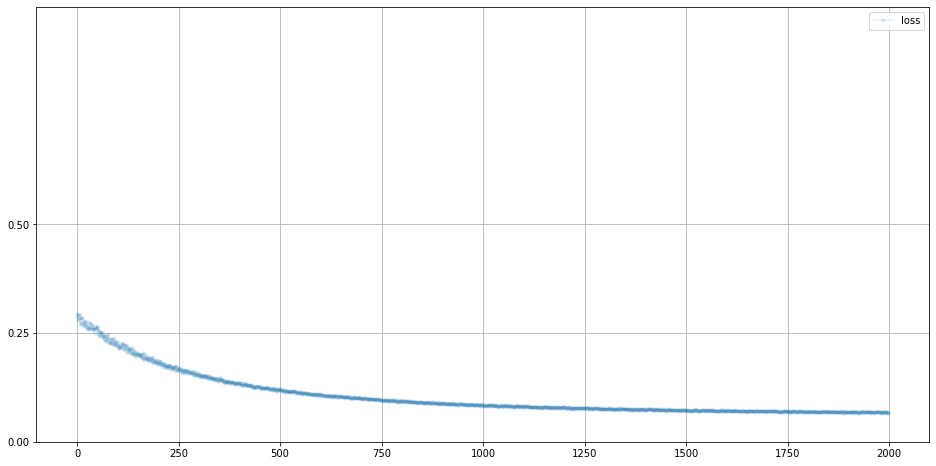

In [ ]:
D.plot_progress()

In [ ]:
print(D.forward(generate_real()).item())

0.2605503797531128


In [ ]:
print(D.forward(generate_random(4)).item())

0.2623172700405121


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,3),
            nn.Sigmoid(),
            nn.Linear(3,4),
            nn.Sigmoid()
        )
        self.optimizer = torch.optim.SGD(self.parameters(),lr = 1e-3)

        self.counter = 0
        self.progress = []
    def forward(self,x):
        return self.model(x)
    
    def train(self,D,inputs,targets):
        g_output = self.forward(inputs) # generator 훈련
        d_output = D.forward(g_output) # 판별기에 전달
        loss = D.loss(d_output,targets) # 실제값과 판별기에서 나온 값 비교 loss
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    def plot_progress(self):
        # print(self.progress)
        df = pd.DataFrame(self.progress,columns = ['loss'])
        df.plot(ylim = (0,1.0), figsize = (16,8),alpha = 0.1,marker = '.',grid = True,yticks = (0,0.25,0.5))    

In [ ]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.5560, 0.2605, 0.4940, 0.5815], grad_fn=<SigmoidBackward0>)

In [ ]:
## GAN 훈련

In [ ]:
D = Discriminator()
G = Generator()

for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1.0])) # 판별기 훈련
    D.train(G.forward(torch.FloatTensor([0.5]).detach()),torch.FloatTensor([0,0]))
    G.train(D,torch.FloatTensor([0.5]),torch.FloatTensor([1.0]))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


counter =  10000
counter =  20000


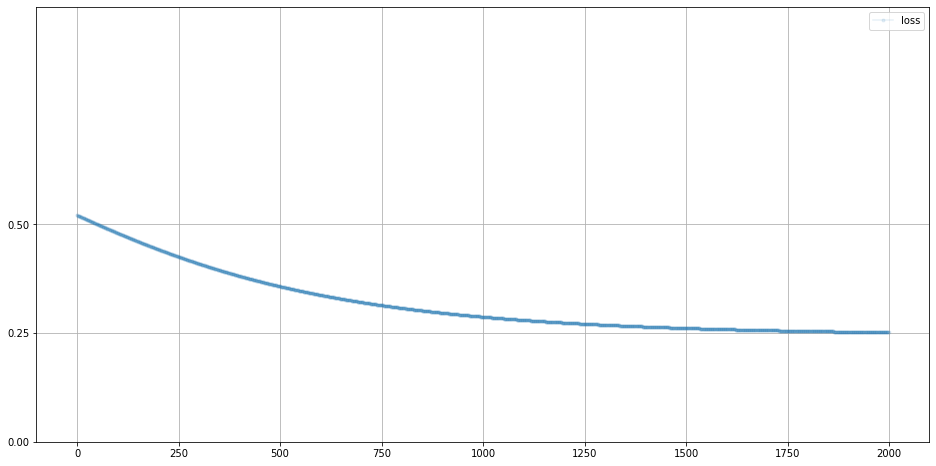

In [ ]:
D.plot_progress()

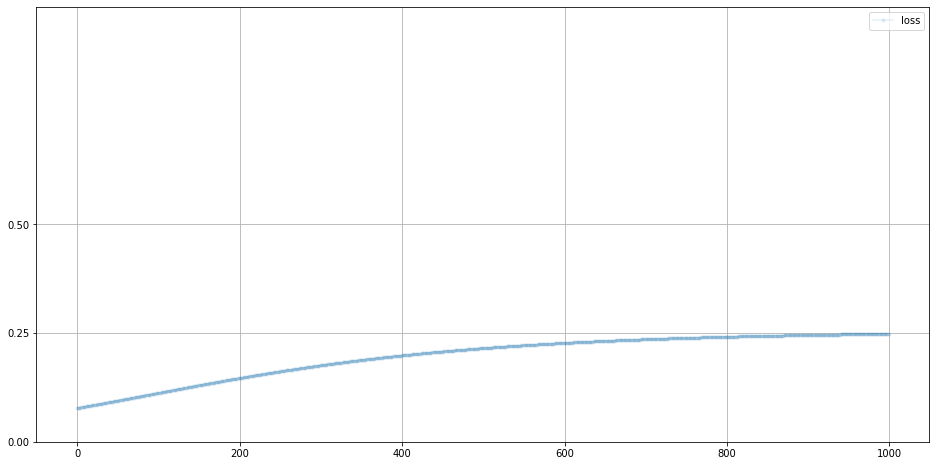

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.4117, 0.2849, 0.5480, 0.5428], grad_fn=<SigmoidBackward0>)